# Population

In [64]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

In [53]:
HIV_df = pd.read_csv("finalhiv.csv")
HIV_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [54]:
gdp_df = pd.read_csv("finalgdp.csv")
gdp_df.drop("Unnamed: 0", axis = 1, inplace = True)

## 2007 - 2017

In [55]:
compare_HIV = HIV_df[['Country Name', '2007', '2017']].copy()
compare_gdp = gdp_df[['Country Name', '2007', '2017']].copy()
compare_HIV.columns = ['country', 'HIV_2007', 'HIV_2017']
compare_gdp.columns = ['country', 'gdp_2007', 'gdp_2017']

compare = pd.merge(compare_gdp, compare_HIV)


## Population 2017

In [70]:
import json
pop2017 = pd.read_json('worldpopulation.json')
pop2017.drop(['Rank','World'], axis = 1, inplace = True)

pop2017

,country,population
0,China,1388232693
1,India,1342512706
2,U.S.,326474013
3,Indonesia,263510146
4,Brazil,211243220
...,...,...
190,San Marino,32104
191,Palau,21726
192,Nauru,10301
193,Tuvalu,9975


## Population 2007

In [57]:
pop2007 = pd.read_csv('WPP2019_TotalPopulationBySex.csv')

# Drop the not needed columns
pop2007.drop(['LocID', 'VarID', 'Variant', 'MidPeriod', 'PopMale', 'PopFemale'], axis = 1, inplace = True)

# Drop all the years that are not 2007
indexNames = pop2007[pop2007['Time'] != 2007].index
pop2007.drop(indexNames , inplace=True)

# Remove all non-countries
countries = pop2017['country'].tolist()
pop2007 = pop2007[pop2007['Location'].isin(countries)]

# Make the population a full number
pop2007['PopTotal'] = pop2007['PopTotal'].apply(lambda x: int(x*1000))
pop2007.drop(['Time'], axis = 1, inplace = True)
pop2007.columns=['country', 'population']

## Populations 2007 & 2017 (Top 5 Growth)

Text(0, 0.5, 'Population')

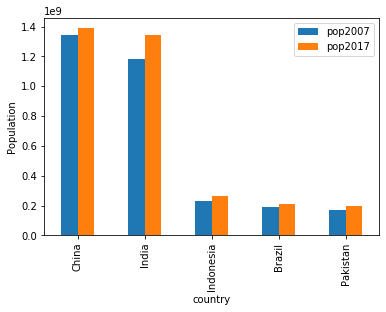

In [85]:
populations = pd.merge(pop2007, pop2017, how = 'inner', on = 'country')
populations.columns = ['country', 'pop2007', 'pop2017']

populations.set_index('country', inplace = True)

highest_pop = populations.sort_values('pop2017', ascending = False).head()

highest_pop.plot.bar()
plt.ylabel('Population')

## Deathrate per 1000000 residents in 2007 and 2017

,country,gdp_2007,gdp_2017,HIV_2007,HIV_2017,pop2007,pop2017,HIV/pop2007,HIV/pop2017
80,Lesotho,1980.900154,3132.495534,3324.0,1238.0,1986926,2185159,1672.935983,566.549162
94,Mozambique,869.416205,1418.485398,32748.0,13726.0,21673319,29537914,1510.982236,464.690905
154,Zimbabwe,1705.901346,2825.725122,17862.0,2532.0,12255920,16337760,1457.418129,154.978406
152,South Africa,11240.260370,13438.282890,66930.0,10200.0,49119765,55436360,1362.587952,183.994764
153,Zambia,2637.277877,4090.120040,14590.0,5002.0,12502958,17237931,1166.923859,290.174035
...,...,...,...,...,...,...,...,...,...
11,Belgium,36755.656330,50220.866670,0.0,0.0,10697576,11443830,0.000000,0.000000
46,France,34088.360080,44255.941640,0.0,2.0,61869229,64938716,0.000000,0.030798
115,Poland,16787.970250,29922.204980,0.0,0.0,38353339,38563573,0.000000,0.000000
81,Lithuania,19095.436770,33314.740370,0.0,0.0,3258984,2830582,0.000000,0.000000


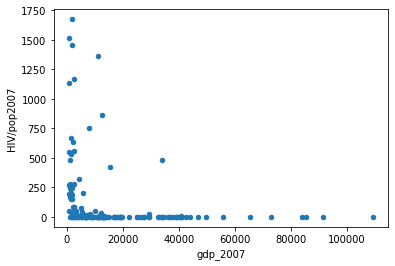

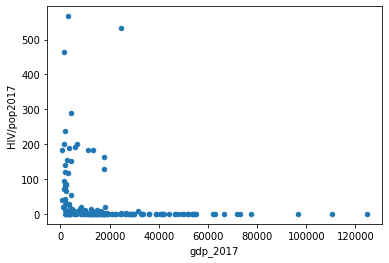

In [59]:
yrs_cmp = pd.merge(compare, populations)

### AMOUNT OF DEATHS PER 1000000 residents in 2007
deaths_by_pop2007 = yrs_cmp['HIV_2007']/(yrs_cmp['pop2007']/1000000)
yrs_cmp['HIV/pop2007'] = deaths_by_pop2007

### AMOUNT OF DEATHS PER 1000000 residents in 2007
deaths_by_pop2017 = yrs_cmp['HIV_2017']/(yrs_cmp['pop2017']/1000000)
yrs_cmp['HIV/pop2017'] = deaths_by_pop2017


death_pop_07 = yrs_cmp.plot.scatter(x='gdp_2007', y='HIV/pop2007')
death_pop_17 = yrs_cmp.plot.scatter(x='gdp_2017', y='HIV/pop2017')

yrs_cmp = yrs_cmp.sort_values(by='HIV/pop2007', ascending=False)

yrs_cmp

## Deaths per 1000000

In [68]:
popyears = pd.read_csv('WPP2019_TotalPopulationBySex.csv')

# Drop the not needed columns
popyears.drop(['LocID', 'VarID', 'Variant', 'MidPeriod', 'PopMale', 'PopFemale'], axis = 1, inplace = True)
popyears = popyears[popyears['Location'].isin(top3)]

# Drop all the years that are not 2007
years = range(2007, 2018)
indexNames = popyears[~popyears['Time'].isin(years)].index
popyears.drop(indexNames , inplace=True)

# Make the population a full number
popyears['PopTotal'] = popyears['PopTotal'].apply(lambda x: int(x*1000))

popyears.columns=['country', 'year', 'population']


In [61]:
pop_top3 = popyears[popyears['country'].isin(['Lesotho', 'Mozambique', 'Zimbabwe'])]
hiv_top3 = HIV_df[HIV_df['Country Name'].isin(['Lesotho', 'Mozambique', 'Zimbabwe'])]
pop_top3.index = pop_top3['year']

hiv_top3 = pd.melt(hiv_top3, id_vars='Country Name', value_vars=list(hiv_top3.columns[1:]), var_name='year', value_name='Deaths')
hiv_top3.index = hiv_top3['year']
hiv_top3.drop(['year'], axis = 1, inplace = True)
hiv_top3 = hiv_top3.sort_values(by=['Country Name', 'year'])

pop_top3['deaths'] = hiv_top3['Deaths'].values
pop_top3['deaths/pop'] = pop_top3['deaths']/ pop_top3['population'] * 1000000
pop_top3.drop(['population', 'deaths', 'year'], axis = 1, inplace = True)
pop_top3 = pop_top3.pivot_table(columns = 'country', index = 'year', values = 'deaths/pop')
del pop_top3.index.name


Text(0, 0.5, 'GDP')

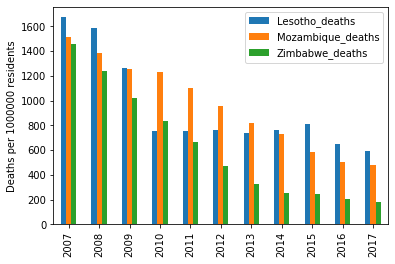

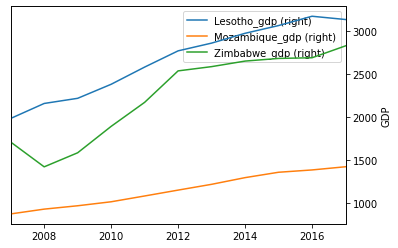

In [62]:
combined_df = pivot_gdp.join(pop_top3, how = 'outer', lsuffix='_gdp', rsuffix='_deaths')
nig_plot = combined_df.filter(regex='deaths$',axis=1).plot(kind = 'bar')
plt.ylabel('Deaths per 1000000 residents')
nig_plot = combined_df.filter(regex='gdp$',axis=1).plot(secondary_y = True)
plt.ylabel('GDP')

## Total Deaths Comparison

Country Name,Lesotho_gdp,Mozambique_gdp,Zimbabwe_gdp,Lesotho_deaths,Mozambique_deaths,Zimbabwe_deaths
2007,1980.900154,869.416205,1705.901346,3324.0,32748.0,17862.0
2008,2155.306978,925.180540,1417.507098,3156.0,30852.0,15362.0
2009,2215.177375,964.335334,1581.161558,2518.0,28772.0,12774.0
2010,2378.563578,1010.752656,1888.566739,1501.0,29032.0,10594.0
2011,2578.639634,1078.208603,2168.110293,1516.0,26734.0,8594.0
2012,2767.675610,1146.642098,2534.541919,1532.0,23816.0,6224.0
2013,2857.768834,1213.929695,2583.985638,1498.0,20902.0,4398.0
2014,2972.012946,1291.746810,2648.568967,1560.0,19240.0,3410.0
2015,3062.068836,1354.391906,2679.580317,1672.0,15882.0,3344.0
2016,3170.578608,1381.315497,2687.385429,1350.0,13982.0,2852.0


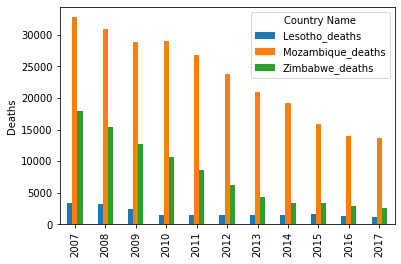

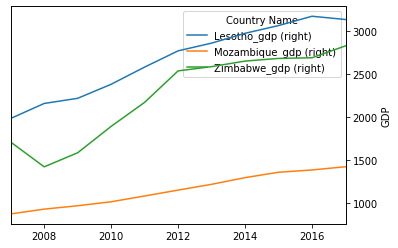

In [82]:
top3 = yrs_cmp['country'].iloc[:3]

top3_HIV = HIV_df[HIV_df['Country Name'].isin(top3)]
top3_gdp = gdp_df[gdp_df['Country Name'].isin(top3)]

pivot_HIV = top3_HIV.pivot_table(columns = 'Country Name')
pivot_gdp = top3_gdp.pivot_table(columns = 'Country Name')
pivot_gdp.index = pivot_gdp.index.astype(int)
pivot_HIV.index = pivot_gdp.index.astype(int)
del pivot_gdp.index.name

combined_df = pivot_gdp.join(pivot_HIV, how = 'outer', lsuffix='_gdp', rsuffix='_deaths')
#print(combined_df)

nig_plot = combined_df.filter(regex='deaths$',axis=1).plot(kind = 'bar')
plt.ylabel('Deaths')
nig_plot = combined_df.filter(regex='gdp$',axis=1).plot(secondary_y = True)
plt.ylabel('GDP')

combined_df